In [ ]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
##Using Pipeline class
from sklearn.pipeline import Pipeline
##Using StandardScaler to scale all the numerical attributes
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

warnings.filterwarnings('ignore')

In [2]:
# reading the .data file using pandas
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

# Exploratory data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [4]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

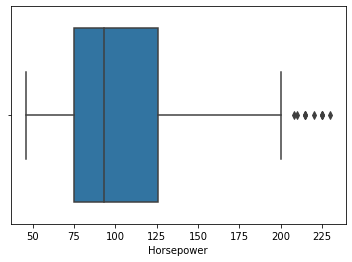

In [6]:
sns.boxplot(x=data['Horsepower'])

In [ ]:
# Fill in the missing value
median = data.Horsepower.median()
data.Horsepower.fillna(median,inplace=True)

In [ ]:
## Category distribution
(data.Cylinders.value_counts()/len(data))*100

In [ ]:
(data.Origin.value_counts()/len(data))*100

In [ ]:
##pairplots to get an intuition of potential correlations
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [4]:
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [5]:
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [6]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

In [ ]:
data_tr = data.copy()
data_tr.Origin=data_tr.Origin.map({1:'India',2: 'USA', 3:'Germany'},)
data_tr.head()
data_tr = preprocess_origin_cols(data)

In [ ]:
data_tr.info()

In [ ]:
data_cat =   data_tr[['Origin']]

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
cate_encoder = OneHotEncoder()
data_1hot = cate_encoder.fit_transform(data_cat)
data_1hot.toarray()[:5]

In [ ]:
cate_encoder.categories_

In [ ]:
# Handling Missing values
num_data = data.iloc[:,:-1]
num_data.info()

In [ ]:
imputer = SimpleImputer(strategy='median')
imputer.fit(num_data)

In [ ]:
imputer.statistics_

In [ ]:
X = imputer.transform(num_data)

In [ ]:
data_tr = pd.DataFrame(X, columns=num_data.columns,index = num_data.index)

In [ ]:
data_tr.head()

In [ ]:


acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

In [ ]:

numerics = ['float64', 'int64']

num_data = data_tr.select_dtypes(include=numerics)

##pipeline for numerical attributes
##imputing -> adding attributes -> scale them
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
    ])

num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

In [ ]:


##Transform different columns or subsets using ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attrs = list(num_data)
cat_attrs = ["Origin"]

##complete pipeline to transform 
##both numerical and cat. attributes
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])

prepared_data = full_pipeline.fit_transform(data)
prepared_data[0]



In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline


def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [9]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

In [10]:
data.iloc[[0]]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3


In [11]:
##from raw data to processed data in 2 steps
preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])

In [12]:
prepared_data.shape

(318, 11)

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression()

In [14]:
##testing the predictions with the 
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

Prediction of samples:  [29.08069379 27.78336755 26.08031176 12.70419279 22.23454159]


In [15]:
print("Actual Labels of samples: ", list(sample_labels))

Actual Labels of samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


In [16]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9590402225760863

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor()

In [18]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [20]:
tree_reg_rmse_scores

array([2.9645299 , 3.01034674, 2.97615524, 3.29236807, 2.23515939,
       3.05424909, 3.70624473, 4.82872266, 4.18884848, 2.60495805])

In [21]:
tree_reg_rmse_scores.mean()

3.286158234448089

In [22]:
scores = cross_val_score(lin_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.43254597, 3.45157629, 3.6621715 , 2.59652976, 2.48023405,
       2.74798115, 3.32524647, 2.42208917, 3.78133275, 2.8573747 ])

In [23]:
lin_reg_rmse_scores.mean()

3.0757081793709324

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.5897686711039025

In [25]:


from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()



3.086591620802819

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10,20, 30], 'max_features': [2, 4, 6, 10, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 10, 8],
                          'n_estimators': [3, 10, 20, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 30}

In [28]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)



3.6866246758920354 {'max_features': 2, 'n_estimators': 3}
2.951106563578614 {'max_features': 2, 'n_estimators': 10}
2.9976537832520065 {'max_features': 2, 'n_estimators': 20}
2.903245961604919 {'max_features': 2, 'n_estimators': 30}
3.286014832769748 {'max_features': 4, 'n_estimators': 3}
2.947056972368722 {'max_features': 4, 'n_estimators': 10}
2.7901521499117674 {'max_features': 4, 'n_estimators': 20}
2.7713557232522255 {'max_features': 4, 'n_estimators': 30}
3.2529686434885465 {'max_features': 6, 'n_estimators': 3}
2.7570890830173673 {'max_features': 6, 'n_estimators': 10}
2.7666503147694166 {'max_features': 6, 'n_estimators': 20}
2.698323809732342 {'max_features': 6, 'n_estimators': 30}
3.146790657583108 {'max_features': 10, 'n_estimators': 3}
2.7222550006027086 {'max_features': 10, 'n_estimators': 10}
2.711193518054126 {'max_features': 10, 'n_estimators': 20}
2.6427568885113506 {'max_features': 10, 'n_estimators': 30}
3.033573449966901 {'max_features': 8, 'n_estimators': 3}
2.9012

In [29]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([0.19316319, 0.32656634, 0.1117703 , 0.18562822, 0.01066678,
       0.12686737, 0.02620908, 0.01344531, 0.00247245, 0.00102562,
       0.00218535])

In [30]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importance), reverse=True)

[('acc_on_power', 0.02620908488251938),
 ('acc_on_cyl', 0.013445310161909993),
 ('Weight', 0.1856282157443337),
 ('Model Year', 0.12686736854136235),
 ('Horsepower', 0.11177030005224138),
 ('Displacement', 0.3265663380547483),
 ('Cylinders', 0.19316319183306413),
 ('Acceleration', 0.010666775527549485)]

In [48]:
(X_test_preprocessed).shape

(80, 7)

In [50]:
pipeline_transformer(X_test_preprocessed).shape

(80, 11)

In [31]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

In [32]:
X_test.iloc[[0]]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
128,6,250.0,100.0,3336.0,17.0,74,1


In [33]:
X_test_preprocessed = preprocess_origin_cols(X_test)

In [34]:
X_test_preprocessed.iloc[[0]]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
128,6,250.0,100.0,3336.0,17.0,74,India


In [35]:
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [36]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [37]:


##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)



array([34.22      , 19.04      , 18.60666667])

In [40]:
final_model

RandomForestRegressor(max_features=10, n_estimators=30)

In [38]:
import pickle
##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [39]:
##loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([34.22      , 19.04      , 18.60666667])